In [126]:
##LOGISTIC REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [127]:
# Step-1 Data Generation
X,y = make_blobs(n_samples=2000,n_features=2,centers =2,random_state=42,cluster_std=3)
n_features = 2
print(X.shape,y.shape)

(2000, 2) (2000,)


In [128]:
# Step-2 Visualise the data
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
    plt.show()

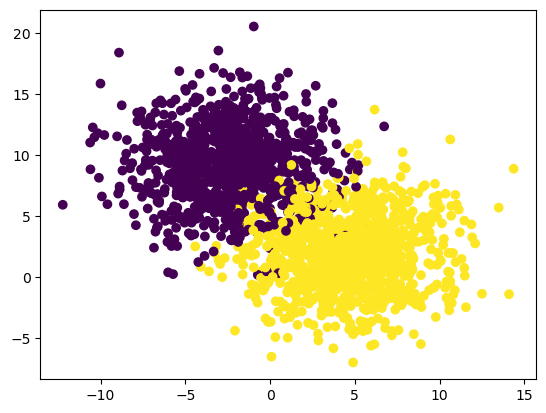

In [129]:
visualise(X,y)

In [130]:
# Step-3 Normalise 
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

In [131]:
X=normalise(X)

In [132]:
print(X.mean(axis=0),X.std(axis=0))

[ 1.20681243e-16 -2.11325402e-15] [1. 1.]


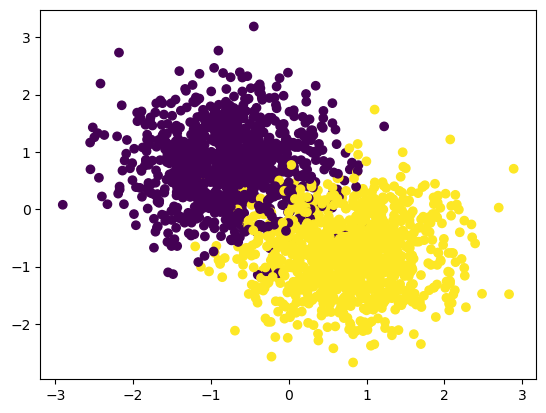

In [133]:
visualise(X,y)

In [134]:
# Step-4 train-test-split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=0)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(1600, 2) (1600,)
(400, 2) (400,)


In [135]:
#Modelling

# Sigmoid function
def sigmoid(X):
    return 1/(1 + np.exp(-X))

# Hypothesis
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

# Loss(Binary Cross Entrophy)
def loss(y,yp):
    loss = -np.mean(y*np.log(yp) + (1-y)*(np.log(1-yp)))
    return loss

# Gradient
def gradient(X,y,yp):
    m = X.shape[0]
    grad = (-1/m)*np.dot(X.T,(y-yp))
    return grad

# Preprocessing X
def preprocess(X):
    if X.shape[1]== n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))
    return X

# Training
def train(X,y,learning_rate=0.2,max_Iters =300):
    theta = np.random.randn(n_features+1,1)
    error_list = []
    for i in range(max_Iters):
        yp = hypothesis(X,theta)
        err = loss(y,yp)
        error_list.append(err)
        grad = gradient(X,y,yp)
        theta = theta - learning_rate*grad
    plt.plot(error_list)
    plt.show()
    return theta
    

In [136]:
Xtrain = preprocess(Xtrain)
Xtest = preprocess(Xtest)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

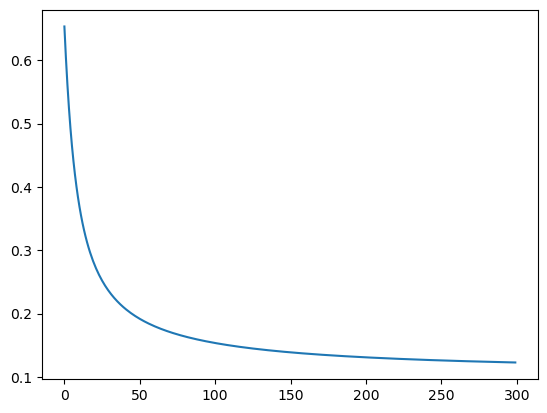

[[ 0.0156186 ]
 [ 2.53174556]
 [-2.63675456]]


In [137]:
theta = train(Xtrain,ytrain)
print(theta)

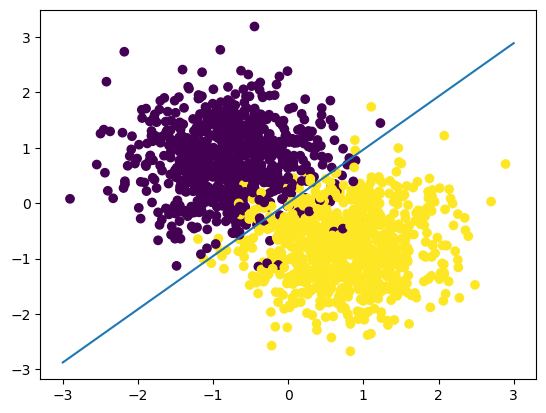

In [138]:
# VIsulaising Boundary 
plt.scatter(Xtrain[:,1],Xtrain[:,2],c=ytrain,cmap='viridis')
x1 = np.linspace(-3,3,6)
x2 = -(theta[0]+ theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

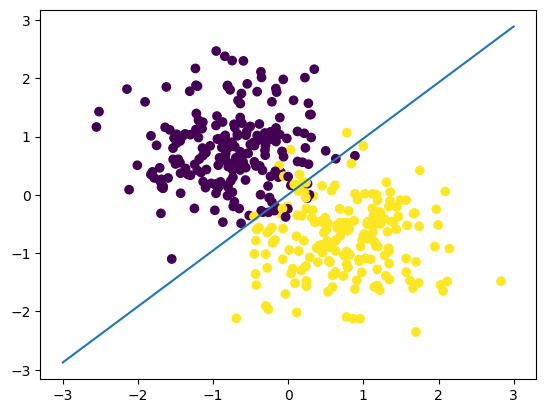

In [139]:
# VIsulaising Boundary 
plt.scatter(Xtest[:,1],Xtest[:,2],c=ytest,cmap='viridis')
x1 = np.linspace(-3,3,6)
x2 = -(theta[0]+ theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

In [140]:
# Prediction and Accuracy 
def predict(X,theta):
    h = hypothesis(X,theta)
    predictions = np.zeros((X.shape[0],1),dtype='int')
    predictions[h>=0.1] = 1
    return predictions
preds = predict(Xtest,theta)
print(preds)

[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


In [141]:
def accuracy(X,y,theta):
    preds = predict(X,theta)
    return (((y==preds).sum())/y.shape[0])*100
acc1= accuracy(Xtrain,ytrain,theta)
acc2 =accuracy(Xtest,ytest,theta)
print(acc1, acc2)

88.625 89.25


In [142]:
##USING SCIKIT LEARN

In [148]:
from sklearn.linear_model import LogisticRegression

In [152]:
# Make instance of model
X,y = make_blobs(n_samples=2000,n_features=2,centers =2,random_state=42,cluster_std=3)
model = LogisticRegression()

In [153]:
# Fit the model
model.fit(X,y)

LogisticRegression()

In [155]:
model.predict(X)

array([0, 0, 0, ..., 1, 0, 1])

In [156]:
model.score(X,y)

0.96

In [157]:
#MULTI CLASS CLASSIFICATION USING OVR(one vs rest)

In [160]:
# Make instance of model
X,y = make_blobs(n_samples=2000,n_features=2,centers =4,random_state=42,cluster_std=3)
model = LogisticRegression()

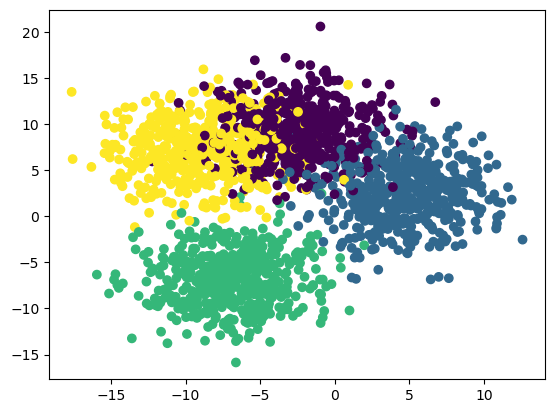

In [164]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.show()

In [165]:
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3]), array([500, 500, 500, 500], dtype=int64))


In [167]:
model =LogisticRegression(multi_class='ovr')
model.fit(X,y)
model.predict(X)
model.score(X,y)

0.9025